In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')

In [2]:
print(fish.columns)

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')


In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [14]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target,
                                                                      random_state=42)

#### ↓↓↓훈련셋과 테스트셋의 특성을 표준화 전처리

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [17]:
print(np.round(train_scaled, decimals=3))

[[ 0.92   0.609  0.81   1.852  1.001]
 [ 0.3    1.547  1.453 -0.47   0.273]
 [-1.086 -1.686 -1.708 -1.702 -2.004]
 [-0.797 -0.609 -0.675 -0.825 -0.276]
 [-0.713 -0.731 -0.701 -0.08  -0.703]
 [-0.913 -0.965 -0.953 -0.88  -0.992]
 [-0.797 -0.703 -0.762 -0.783 -0.545]
 [ 0.638  0.563  0.732  1.645  0.507]
 [-0.741 -0.674 -0.736 -0.612 -0.557]
 [-0.868 -0.796 -0.892 -0.934 -1.022]
 [ 0.821  0.75   0.671  0.498  1.473]
 [ 0.3    0.235  0.428  1.36   0.223]
 [ 0.34   0.403  0.237  0.288  0.957]
 [-0.544 -0.515 -0.475  0.366 -0.478]
 [ 1.708  1.453  1.332  0.896  1.919]
 [ 0.903  0.703  0.889  1.89   0.855]
 [-1.082 -1.612 -1.622 -1.7   -1.928]
 [ 1.708  1.359  1.21   0.758  1.724]
 [-0.797 -0.721 -0.71  -0.665 -0.642]
 [ 0.103  0.047  0.237  0.884  0.418]
 [ 0.177  1.312  1.236 -0.391 -0.077]
 [ 1.497  1.031  1.219  2.443  1.403]
 [ 1.567  2.174  2.07   0.016  1.05 ]
 [-0.403 -0.093 -0.206 -0.39   0.072]
 [-0.628 -0.731 -0.701  0.132 -0.633]
 [ 0.23   0.235  0.428  1.334  0.4  ]
 [-0.699 -0.

In [22]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
   # loss = 손실함수 / log = 로지스틱 / max_iter = epoch 수 = 반복 수
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.773109243697479
0.775


C:\Users\cbnul\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [23]:
sc.partial_fit(train_scaled, train_target)
   # 모델을 이어서 훈련할 때 사용하는 함수, 호출할 때마다 1에포크씩 이어서 훈련
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


### 에포크의 과대 / 과소 적합
# 
##### * 과대적합이란?
##### 훈련셋에 너무 많이 훈련되어 훈련셋에 잘 맞아 테스트셋에는 오히려 점수가 나쁘게 나올 수 있는 모델

In [24]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [26]:
for _ in range(0, 300):   # 300번 에포크 반복
    sc.partial_fit(train_scaled, train_target, classes=classes)   # 이어서 반복훈련
    train_score.append(sc.score(train_scaled, train_target))
       # train_score에 train 정확도 삽입
    test_score.append(sc.score(test_scaled, test_target))
       # test_score에 test 정확도 삽입

#### ↓↓↓ train_score와 test_score 시각화 해보기

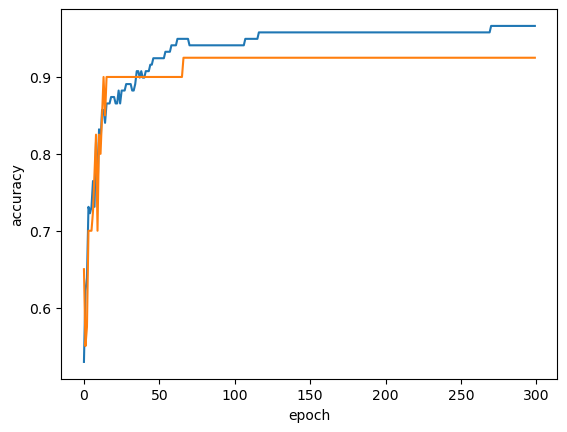

In [31]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# epoch 70~ 100이 적합해 보인다.

#### 그렇다면 epoch 100으로 모델을 다시 훈련해보자

In [32]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
    # tol : 성능이 향상되지 않으면 자동으로 훈련을 멈춘다. None값을 주면 100회를 무조건 반복하겠다는 뜻이다.
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
